# Star Type Predictor | Logistic Regression using Scikit-Learn

---

<center> <img src='https://camo.githubusercontent.com/c9e50b286b169461e184f4bcdc6f1dbf80690dbb55775a541a7b3fb64ef5090c/68747470733a2f2f692e70696e696d672e636f6d2f6f726967696e616c732f38342f35352f31342f38343535313431386637616439316334376437353034366462376334323939332e706e67' width=50%/>

## In this Session we will
1. Understand the Problem Statement
2. Import Libraries
3. Read and Explore the Dataset using Pandas
4. Perform Train-Validation Split (Test on Real Data)
5. Create Pipeline (Scaler and Classifier)
6. Training and Predictions
7. Testing

#AIM
Using sklearn's Logistic Regression implementation

# Step 1
Import libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2
Read and explore the csv

In [37]:
csv_path = '/content/star_type_.csv'

#Read
df = pd.read_csv(csv_path)
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,3068,0.002400,0.1700,16.12,Brown Dwarf
1,3042,0.000500,0.1542,16.60,Brown Dwarf
2,2600,0.000300,0.1020,18.70,Brown Dwarf
3,2800,0.000200,0.1600,16.65,Brown Dwarf
4,1939,0.000138,0.1030,20.06,Brown Dwarf


Explore the basic information about the df

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 9.5+ KB


data preprocessing,
Machine learning modelling (weights and bias)

In [39]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,3068,0.002400,0.1700,16.12,Brown Dwarf
1,3042,0.000500,0.1542,16.60,Brown Dwarf
2,2600,0.000300,0.1020,18.70,Brown Dwarf
3,2800,0.000200,0.1600,16.65,Brown Dwarf
4,1939,0.000138,0.1030,20.06,Brown Dwarf
...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Supergiant
236,30839,834042.000000,1194.0000,-10.63,Supergiant
237,8829,537493.000000,1423.0000,-10.73,Supergiant
238,9235,404940.000000,1112.0000,-11.23,Supergiant


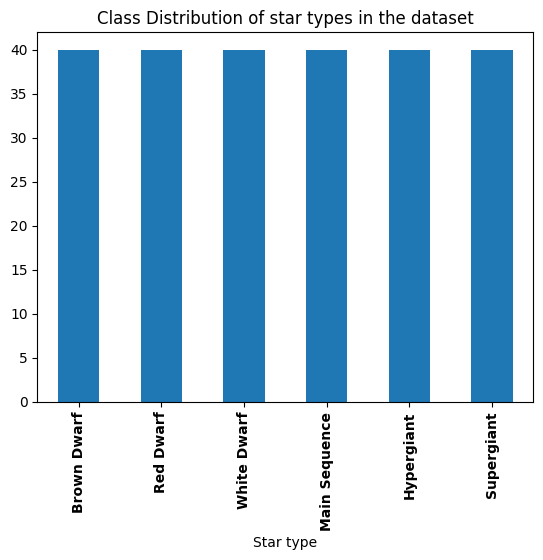

In [40]:
#Plot unique classes in star type columns
df['Star type'].value_counts().plot(kind = 'bar',) #color = ['brown', 'red','maroon','pink'])
plt.xticks(weight = 'bold')
plt.title('Class Distribution of star types in the dataset')
plt.show()

- Using bar plot, we can see that each class has 40 samples
- This is perfectly balanced data, hence we can use accuracy as our evalution metric

In [41]:
#By default sklearn's Logistic Regression takes care about encoding
#They use Label Encoding for SAG solver
#You can manually implement OneHotEncoding as well if you wish to

# 3) step :- Splitting the data into training and validation set

- In real life you should have abundant dataset
- One should be used for training(train set)
- One should be used for validation(dev set)
- One should be used for testing(Unseen set)
- rn, we just have one dataset thus we need to manually split it
- This is only to be done when you don't have more than one dataset for the same data
- This splitting is called train-val split that you can perform manually or using sklearn's train_test_split function

In [42]:
#First prepare X (input features dataframe) and y(targer data series)
X = df.drop('Star type', axis = 1)
y = df['Star type']

In [43]:
print(f"The shape of input features: {X.shape}")
print(f"The shape of target : {y.shape}")

The shape of input features: (240, 4)
The shape of target : (240,)


In [44]:
#split original data into train-val set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, #Input features( array like)
                                                  y, #target data(array like)
                                                  test_size = 0.2,#validation split size in percentage
                                                  shuffle = True, #shuffle the dataset
                                                  random_state = 42,)

In [45]:
#check the shaped of X_train, y_train, X_val, and y_val
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print()
print(f'Shape of X_val: {X_val.shape}')
print(f'Shape of y_val: {y_val.shape}')


Shape of X_train: (192, 4)
Shape of y_train: (192,)

Shape of X_val: (48, 4)
Shape of y_val: (48,)


# 4) Create SKlearn pipline to perform data processing and classification
- This will help you to avoid a problem like data leakage.
- How? check the next cell

In [46]:
#Imports to create pipeline for scaling and classifier steps
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [47]:
#pipeline is used to store the steps to be implemented on the dataset
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', LogisticRegression())
])

### **Hyper Parameter Tuning**

In [48]:
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'classifier__penalty': ['l2'], # L2 regularization
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],  # Suitable solvers for multi-class
    'classifier__max_iter': [100, 200, 300, 400, 500,1000,5000],  # Number of iterations for convergence
    'classifier__tol': [1e-4, 1e-3, 1e-10],  # Tolerance for stopping criteria
    'classifier__class_weight': [None, 'balanced'],  # Adjusting for class imbalance
    'classifier__fit_intercept': [True, False]  # Include an intercept in the model
}

In [49]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(pipeline, param_grid = param_grid, cv = 4, verbose = True, n_jobs = -1)

In [50]:
best_clf = clf.fit(X_train, y_train)

Fitting 4 folds for each of 2352 candidates, totalling 9408 fits


In [51]:
best_clf.best_params_

{'classifier__C': 1000,
 'classifier__class_weight': None,
 'classifier__fit_intercept': True,
 'classifier__max_iter': 100,
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg',
 'classifier__tol': 0.0001}

In [52]:
best_clf

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__fit_intercept': [True, False],
                         'classifier__max_iter': [100, 200, 300, 400, 500, 1000,
                                                  5000],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga'],
                         'classifier__tol': [0.0001, 0.001, 1e-10]},
             verbose=True)

# 5) Train and evaluate the pipeline
- fit()
  - scaler : It will calculate mean and std
  - scalre : it will then transform
  - classifier : It will train the model

- Predict()
  - Scaler : only transform is used
  - classifer : it uses the values of weights and bias to get prediction without training
  

In [58]:
# We used multinominal approach hence the shape is (6,4)
'''
how?

1) Logit calculation ==> z1, z2, z3, z4, z5,z6
2) Softmax probs ==> p(z1), p(z2), p(z3), p(z4), p(z5), p(z6)

Note that, here as we have 6 different equations. Each has their own 4 weights and 1 bias

'''

'\nhow?\n\n1) Logit calculation ==> z1, z2, z3, z4, z5,z6\n2) Softmax probs ==> p(z1), p(z2), p(z3), p(z4), p(z5), p(z6)\n\nNote that, here as we have 6 different equations. Each has their own 4 weights and 1 bias\n\n'

In [59]:
# Get classification report on training data
from sklearn.metrics import classification_report, confusion_matrix

#Predicted on training set
y_pred_train = best_clf.predict(X_train)

#convert the true Y values to arrays
y_train = y_train.values

#Classification report
print(classification_report(y_train, y_pred_train))

               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00        32
   Hypergiant       1.00      1.00      1.00        32
Main Sequence       1.00      1.00      1.00        32
    Red Dwarf       1.00      1.00      1.00        33
   Supergiant       1.00      1.00      1.00        29
  White Dwarf       1.00      1.00      1.00        34

     accuracy                           1.00       192
    macro avg       1.00      1.00      1.00       192
 weighted avg       1.00      1.00      1.00       192



In [60]:
# Get classification report on validation data
from sklearn.metrics import classification_report

#Predicted on validation set
y_pred = best_clf.predict(X_val)

#convert the true Y values to arrays
y_val = y_val.values

#Classification report
print(classification_report(y_val, y_pred))

               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
   Hypergiant       1.00      1.00      1.00         8
Main Sequence       1.00      1.00      1.00         8
    Red Dwarf       1.00      1.00      1.00         7
   Supergiant       1.00      1.00      1.00        11
  White Dwarf       1.00      1.00      1.00         6

     accuracy                           1.00        48
    macro avg       1.00      1.00      1.00        48
 weighted avg       1.00      1.00      1.00        48



- The accuracies for training and validation is 100%
- The reason it is 100% is probably because our dataset is too simple with less
  instances and less features.
- Hence, there is no over or underfitting
- Thus, We can trust this accuracy on the unseen data
- Most of the times the model should correctly predict the class based on input star properties


# 6) You can use any trusted web site
- we are using wiki

In [61]:
df.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type'],
      dtype='object')

In [62]:
df['Star type'].unique()

array(['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence',
       'Hypergiant', 'Supergiant'], dtype=object)

In [69]:
# Create data for testing per star
#details
# name = 'Vega'
# s_type = ' mainsequence'
# star_dict = {
#     'Temperature (K)' : 9500,
#     'Luminosity(L/Lo)' : 47.2,
#     'Radius(R/Ro)' : 2.276,
#     'Absolute magnitude(Mv)' : 0.582,
# }
# name = 'Beetleguese'
# s_type = 'SuperGiant'
# star_dict = {
#     'Temperature (K)' : 3700,
#     'Luminosity(L/Lo)' : 75000,
#     'Radius(R/Ro)' : 700,
#     'Absolute magnitude(Mv)' : -5.85,
# }
# name = 'Antares'
# s_type = 'Super Giant'
# star_dict = {
#     'Temperature (K)' : 3660,
#     'Luminosity(L/Lo)' : 75900,
#     'Radius(R/Ro)' : 680,
#     'Absolute magnitude(Mv)' : -5.28,
# }
# name = 'UY scuti'
# s_type = 'Super Giant'
# star_dict = {
#     'Temperature (K)' : 3550,
#     'Luminosity(L/Lo)' : 124000,
#     'Radius(R/Ro)' : 909,
#     'Absolute magnitude(Mv)' : -6.2,
# }

# name = 'Rho Cassiopeiae'
# s_type = 'Hyper Giant'
# star_dict = {
#     'Temperature (K)' : 5000,
#     'Luminosity(L/Lo)' : 400000,
#     'Radius(R/Ro)' : 564,
#     'Absolute magnitude(Mv)' : -9.5,
# }

# test_df = pd.DataFrame([star_dict], index = [0])
# y_pred = best_clf.predict(test_df)
# y_pred_prob = best_clf.predict_proba(test_df)

# #print the outputs
# print(f"for {name} star: ")
# print(f"true type: {s_type}")
# print(f"predicted type: {y_pred[0]}")
# print()
# print(y_pred_prob)

## step 7) Download the fitted pipline

In [74]:
#Download the fitted pipline using joblib library
from joblib import dump
dump(best_clf, 'pipeline_star_type_pred.joblib')


['pipeline_star_type_pred.joblib']

In [75]:
from joblib import load
best_clf_test = load('pipeline_star_type_pred.joblib')